## Comparação da Remuneração nominal no país

### Importação das bibliotecas e da base

In [2]:
import pandas as pd
import numpy as np
import weightedstats as ws
import seaborn as sns
import matplotlib.pyplot as plt

agregado_vinculos = pd.read_csv("dados/agregado_vinculo")

### Análise no país

#### 1) Variáveis e funções importantes

In [62]:
agrupado_sexo_ano = agregado_vinculos.groupby(by=[ "ano","sexo_trabalhador",])
agrupado_ano = agregado_vinculos.groupby("ano")
agrupado_sexo_ano_idade = agregado_vinculos.groupby(by=[ "idade","ano","sexo_trabalhador",])
def pondera_media(row):
    return np.average(row["valor_remun_media_nominal"], weights=row["numero_vinculos"])

def pondera_mediana(df):
    return ws.numpy_weighted_median(df["valor_remun_media_nominal"], weights=df["numero_vinculos"])

sns.set_style("whitegrid")

#### 2) Comparação das médias no ano

In [3]:
media_rm_br = agrupado_sexo_ano.apply(pondera_media).rename("Média da Remuneração Nominal")
media_rm_br

ano   sexo_trabalhador
1999  1                    750.499641
      2                    609.478229
2009  1                   1588.113883
      2                   1318.641555
2019  1                   3158.481449
      2                   2724.355038
Name: Média da Remuneração Nominal, dtype: float64

#### 3) Comparação da mediana no ano

In [4]:
mediana_rm_br = agrupado_sexo_ano.apply(pondera_mediana).rename("Mediana da Remuneração Nominal")
mediana_rm_br

ano   sexo_trabalhador
1999  1                    454.801889
      2                    387.360000
2009  1                    947.475000
      2                    804.134000
2019  1                   1967.100000
      2                   1714.187500
Name: Mediana da Remuneração Nominal, dtype: float64

#### 4) Tabela completa: media e mediana

In [5]:
newMultIndex = [(gen, ano) for ano in (1999, 2009, 2019) for gen in ("Homens", "Mulheres")] 
descricao_sexo_ano = pd.concat([media_rm_br, mediana_rm_br], axis=1)
descricao_sexo_ano.index = pd.MultiIndex.from_tuples(newMultIndex)
descricao_sexo_ano

,,Média da Remuneração Nominal,Mediana da Remuneração Nominal
Homens,1999,750.499641,454.801889
Mulheres,1999,609.478229,387.360000
Homens,2009,1588.113883,947.475000
Mulheres,2009,1318.641555,804.134000
Homens,2019,3158.481449,1967.100000
Mulheres,2019,2724.355038,1714.187500


#### 5) Salário da mulher em relação ao homem durante os anos

In [8]:
dict_aumento_rm = {}
for ano in (1999, 2009, 2019):
    media_homens = descricao_sexo_ano["Média da Remuneração Nominal"][("Homens", ano)]
    media_mulheres= descricao_sexo_ano["Média da Remuneração Nominal"][("Mulheres", ano)]
    mediana_homens = descricao_sexo_ano["Mediana da Remuneração Nominal"][("Homens", ano)]
    mediana_mulheres= descricao_sexo_ano["Mediana da Remuneração Nominal"][("Mulheres", ano)]
    dict_aumento_rm[ano] = [
        f"{(1 - media_mulheres/media_homens) * 100:.2f}%",
        f"{(1 - mediana_mulheres/mediana_homens) * 100:.2f}%"
    ]

salario_mulher_homem = pd.DataFrame(dict_aumento_rm, index={"Média", "Mediana"})
salario_mulher_homem

,1999,2009,2019
Mediana,18.79%,16.97%,13.74%
Média,14.83%,15.13%,12.86%


#### 6) Salário nominal de acordo com a idade

In [11]:
rm_nominal_idade = agrupado_sexo_ano_idade["valor_remun_media_nominal"].mean().unstack(level=[1, 2])

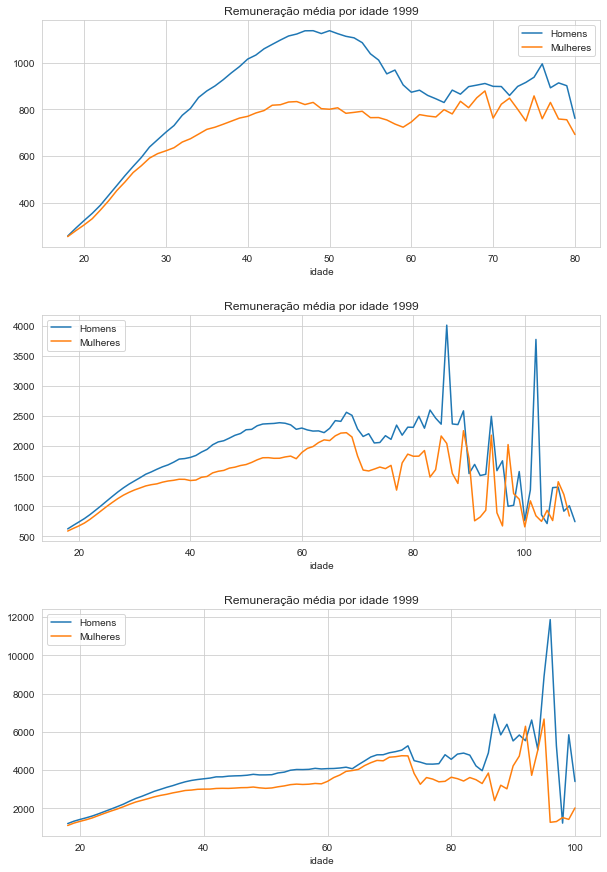

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.3)
for index, ano in enumerate([1999, 2009, 2019]):
    rm_nominal_idade[ano].plot(kind="line", ax=axes[index], figsize=(10, 15), title="Remuneração média por idade 1999")
    axes[index].legend(["Homens", "Mulheres"])

### Análise nas regiões

#### 1) Variáveis importantes

In [38]:
regioes= {
    "norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "centro_oeste": ["DF", "GO", "MT", "MS"],
    "sudeste":["RJ", "SP", "MG", "ES"],
    "sul": ["PR", "RS", "SC"]
}


#### 2) Redução da desigualdade salarial nas regiões de 1999 até 2019

In [7]:
dict_aumento_rm_reg = {}
for reg in regioes:
    vinculos_reg = agregado_vinculos.loc[agregado_vinculos["sigla_uf"].isin(regioes[reg])]
    vinculos_reg =  vinculos_reg.groupby(by=["ano", "sexo_trabalhador"]).apply(pondera_media)
    vinculos_reg_porc_1999 = (vinculos_reg[(1999, 2)]/vinculos_reg[(1999, 1)])
    vinculos_reg_porc_2019 = (vinculos_reg[(2019, 2)]/vinculos_reg[(2019, 1)])
    dict_aumento_rm_reg[reg] = f"{(vinculos_reg_porc_2019/vinculos_reg_porc_1999 - 1) * 100:.2f}%"

salario_mulher_homem_reg = pd.Series(dict_aumento_rm_reg)
salario_mulher_homem_reg

norte            9.77%
nordeste        17.33%
centro_oeste    -0.40%
sudeste          1.40%
sul              6.02%
dtype: object

#### 3) Distribuição dos salários: região nordeste

In [94]:
salarios_nordeste_2019 = agregado_vinculos[
    (agregado_vinculos["sigla_uf"].isin(regioes["nordeste"])) &
    (agregado_vinculos["ano"] == 2019)
]

salarios_nordeste_1999 = agregado_vinculos[
    (agregado_vinculos["sigla_uf"].isin(regioes["nordeste"])) &
    (agregado_vinculos["ano"] == 1999)
]


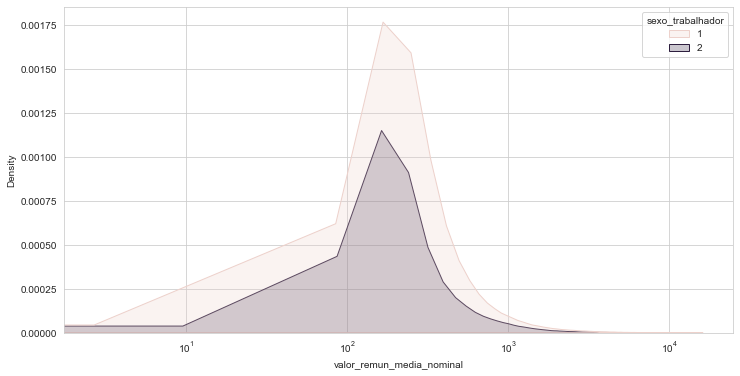

In [98]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=salarios_nordeste_1999, shade=True, x="valor_remun_media_nominal", hue="sexo_trabalhador")
plt.xscale('log')




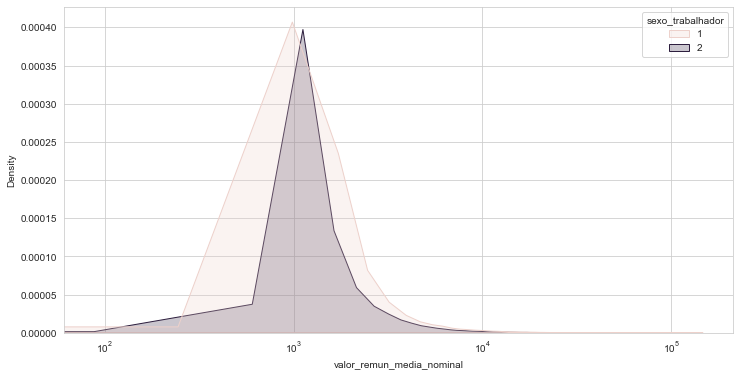

In [99]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=salarios_nordeste_2019, shade=True, x="valor_remun_media_nominal", hue="sexo_trabalhador")
plt.xscale('log')


#### 4) Distribuição dos salários: região centro-oeste

In [107]:
salarios_centro_oeste_2019 = agregado_vinculos[
    (agregado_vinculos["sigla_uf"].isin(regioes["centro_oeste"])) &
    (agregado_vinculos["ano"] == 2019)
]

salarios_centro_oeste_1999 = agregado_vinculos[
    (agregado_vinculos["sigla_uf"].isin(regioes["centro_oeste"])) &
    (agregado_vinculos["ano"] == 1999)
]


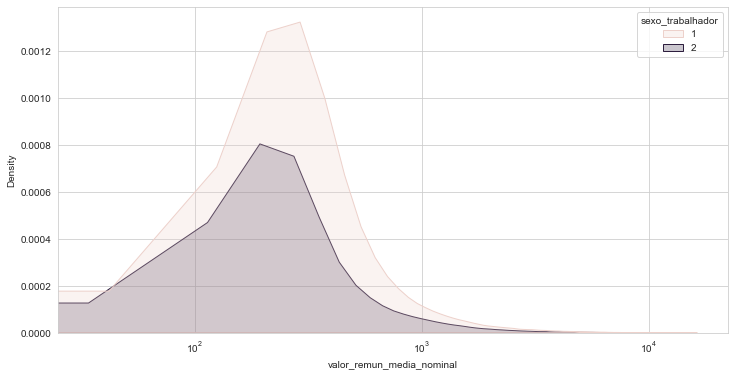

In [108]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=salarios_centro_oeste_1999, shade=True, x="valor_remun_media_nominal", hue="sexo_trabalhador")
plt.xscale('log')

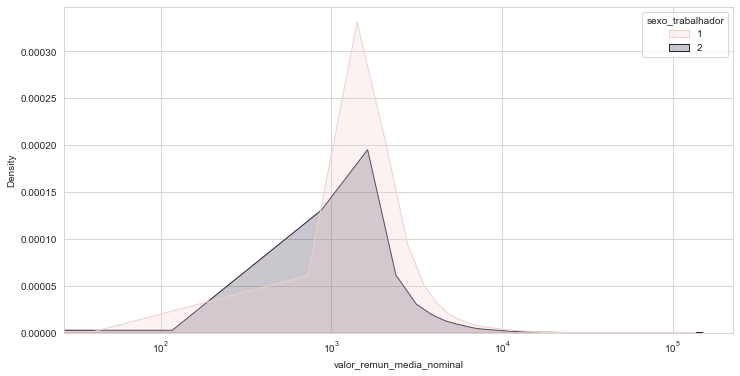

In [109]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=salarios_centro_oeste_2019, shade=True, x="valor_remun_media_nominal", hue="sexo_trabalhador")
plt.xscale('log')